In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [1]:

import numpy as np
import pandas as pd
import os
import keras
from sklearn.datasets import load_files
from keras.utils import np_utils


from keras.preprocessing import image
from keras.layers import Dense, GlobalAveragePooling2D,Dropout,Input
# from keras.layers.advanced_activations import LeakyReLU, ELU
from keras.models import Sequential,Model
from keras import backend as K
from IPython.display import display

from keras.preprocessing.image import ImageDataGenerator

import glob
import cv2
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Dense , Dropout,Activation
from keras import layers, optimizers
import tensorflow as tf
from keras import applications

Using TensorFlow backend.


In [0]:
train_datagen = ImageDataGenerator( rescale=1./255,
      rotation_range=40,
      
                               
      validation_split=0.20)


In [3]:
batch_size=64
img_rows=224
img_cols=224

training_set = train_datagen.flow_from_directory("/content/gdrive/My Drive/binary_set", 
                                                 target_size = (img_rows,img_cols), 
                                                 batch_size = batch_size,
                                                 
                                                 subset="training")


test_set = train_datagen.flow_from_directory("/content/gdrive/My Drive/binary_set", 
                                                 target_size = (img_rows,img_cols),
                                                 batch_size = batch_size,
                                                
                                                 subset='validation')


class_weights={
    0:2,
    1:1
}



Found 1926 images belonging to 2 classes.
Found 480 images belonging to 2 classes.


In [0]:
train_datagen.fit(training_set)

In [14]:


from keras.models import Model
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.layers import GaussianNoise
from keras import regularizers

visible = Input(shape=(img_rows,img_cols,3))                    #////INPUT
''''#visible1 = Input(shape=(img_rows,img_cols,3))                    

p_layer1 = ResNet50(weights=None,include_top=False,input_shape=(img_rows,img_cols,3))(visible)
flat1= Flatten()(p_layer1)


p_layer2 = applications.Xception(weights=None,include_top=False,input_shape=(img_rows, img_cols, 3))(visible)
flat2= Flatten()(p_layer2)

merge =concatenate([flat1,flat2])              #//// MERGE

hidden=Dense(4096,activation='relu')(merge)   # //// INTERPRETATION LAYER
#hidden=Dropout(0.5)(hidden)
hidden=Dense(4096,activation='relu')(hidden)
#hidden=Dropout(0.5)(hidden)
hidden=Dense(1000,activation='relu')(hidden)
#hidden=Dropout(0.45)(hidden)
output=Dense(7,activation='softmax')(hidden)          # /// PREDICTION LAYER


base_model = keras.applications.resnet50.ResNet50(include_top=False,weights=None,input_shape=(img_rows,img_cols,3))

top_model = Sequential()
top_model.add(Flatten())

top_model.add(Dense(7,activation='softmax'))

model = Model(inputs=[base_model.input], outputs=top_model(base_model.output))


'''
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, GlobalMaxPooling2D
from keras import backend as K

base_model=keras.applications.mobilenet.MobileNet(include_top=False,weights=None,input_shape=(img_rows,img_cols,3))

x=base_model.output
x = base_model.layers[-6].output
x=GlobalAveragePooling2D()(x)

x=keras.layers.GaussianNoise(0.1)(x)
x=Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(0.01))(x)
x=Dropout(0.48)(x)

x=keras.layers.GaussianNoise(0.1)(x)
x=Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.01))(x)

x=Dropout(0.3)(x)


'''x=Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.01))(x)
x=Dropout(0.3)(x)
'''
preds=Dense(2,activation='softmax')(x)


model = Model(inputs=[base_model.input], outputs=preds)

print('Model loaded.')

#for layer in base_model.layers:
 #   layer.trainable = False

Model loaded.


In [0]:
for layer in model.layers[:90]:
   layer.trainable = False
for layer in model.layers[90:]:
   layer.trainable = True

In [0]:
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


from keras.utils import plot_model
plot_model(model, to_file='fusion1.png')


In [17]:


import imageio as im
from keras import models
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau




call_early=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=6, verbose=1,
                                         mode='auto', baseline=None, restore_best_weights=False)


reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=3,
                              verbose=1, mode='max', min_lr=0.00001)

checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

callbacks_list=[checkpointer,reduce_lr,call_early]

history=model.fit_generator(training_set,
                            steps_per_epoch = training_set.samples // batch_size,
                            validation_data = test_set, 
                            validation_steps = test_set.samples // batch_size,
                            callbacks=callbacks_list,
                            epochs =35,
                            class_weight=class_weights)


Epoch 1/35
30/30 [==============================] - 46s 2s/step - loss: 0.6872 - acc: 0.7807 - val_loss: 0.7932 - val_acc: 0.7500

Epoch 00001: val_acc improved from -inf to 0.75000, saving model to best_weights.hdf5
Epoch 2/35
30/30 [==============================] - 43s 1s/step - loss: 0.6657 - acc: 0.7734 - val_loss: 0.7076 - val_acc: 0.7212

Epoch 00002: val_acc did not improve from 0.75000
Epoch 3/35
30/30 [==============================] - 43s 1s/step - loss: 0.6513 - acc: 0.7958 - val_loss: 0.7035 - val_acc: 0.7308

Epoch 00003: val_acc did not improve from 0.75000
Epoch 4/35
30/30 [==============================] - 43s 1s/step - loss: 0.6596 - acc: 0.7826 - val_loss: 0.7164 - val_acc: 0.7356

Epoch 00004: val_acc did not improve from 0.75000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 5/35
30/30 [==============================] - 44s 1s/step - loss: 0.6349 - acc: 0.7848 - val_loss: 0.7087 - val_acc: 0.6779

Epoch 00005: val_acc did not

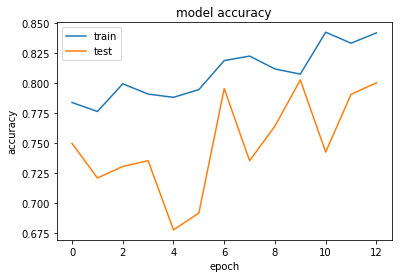

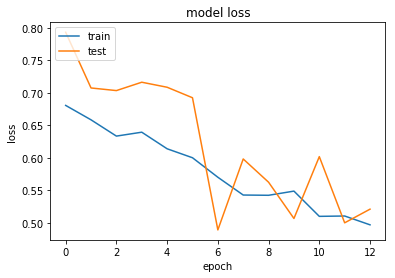

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
scores=model.evaluate_generator(test_set,steps=10)
print(scores)

scores1=model.evaluate_generator(training_set,steps=10)
print(scores1)

[0.5408118210340801, 0.7713815789473685]
[0.39373511672019956, 0.8421875]


In [0]:
model.save("mobile_net.h5")

In [0]:
layer_outputs = [layer.output for layer in model.layers[:14]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

img_path ="/content/gdrive/My Drive/binary_set/MEL/ISIC_0033678.jpg"
img =image.load_img(img_path,target_size=(img_rows, img_cols))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)


label=(training_set.class_indices)
print(label)

# predicting images

# predicting images
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=64)
print("Predicted class is:",classes.argmax(axis=-1))

print('**********************************************************')
  

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
img_path ="/content/gdrive/My Drive/binary_set/others/ISIC_0024358.jpg"
img =image.load_img(img_path,target_size=(img_rows, img_cols))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor/=255.
activations = activation_model.predict(img_tensor) 

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='gray')


In [0]:
x= base_model.inputs

def get_activations(model,model_inputs, print_shape_only=False, layer_name=5):
    print('----- activations -----')
    activations = []
    inp = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        # only one input! let's wrap it in a list.
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None][1:]

    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(0.)
    else:
        list_inputs = [model_inputs, 0.]


    print(list_inputs)
    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations

In [0]:
get_activations(base_model,x)

----- activations -----
[[<tf.Tensor 'input_40:0' shape=(?, 224, 224, 3) dtype=float32>], 0.0]


[]

In [0]:
layer_names = []
for layer in model.layers[:5]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')

In [21]:
test_set.reset()
training_set.reset()

"""""pred=model.predict_generator(training_set,
                             steps=training_set.samples // batch_size,
                             verbose=1)
pred = np.argmax(pred, axis=1)
"""""
pred1=model.predict_generator(test_set,
                             steps=test_set.samples // batch_size,
                             verbose=1)
pred1 = np.argmax(pred1, axis=1)


7/7 [==============================] - 8s 1s/step


In [0]:
print(pred1)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(test_set.classes[0:448], pred1,target_names=test_set.class_indices))
print('******************************************************************')
print('training report')
#print(classification_report(training_set.classes[0:6464], pred,target_names=training_set.class_indices))

              precision    recall  f1-score   support

         MEL       0.54      0.56      0.55       222
      others       0.55      0.53      0.54       226

    accuracy                           0.54       448
   macro avg       0.54      0.54      0.54       448
weighted avg       0.54      0.54      0.54       448

******************************************************************
training report
